# Stanton Murillo Transport Validation

[1] "Ionic transport in high-energy-density matter"  [10.1103/PhysRevE.93.043203](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.043203)

[2]"Efficient model for electronic transport in high energy-density matter "  [https://doi.org/10.1063/5.0048162](https://doi.org/10.1063/5.0048162)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pandas import read_csv

import SMT.core.transport as smt
from SMT.core.physical_constants import *
from SMT.core.physical_parameters import rs_from_n

In [2]:
N_ions = 1
Z, A = 13, 26.98
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
# ρi_gpercc  = 1
ni_array_cc = np.array([6.02660153e+22])#np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
props.Dij*AU_to_cm**2/AU_to_s, ni_array_cc, props.ηi*AU_to_g*AU_to_invcc*AU_to_cm**2/AU_to_s
props.K_11_matrix[1,1], props.K_12_matrix[1,1], props.K_21_matrix[1,1], props.K_22_matrix[1,1], props.K_13_matrix[1,1]

(0.00017552353507528656,
 0.00044646469145111104,
 0.00044646469145111104,
 0.0004474588326562237,
 0.0015765332820670346)

In [3]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])
T_array_AU = np.array([1*eV_to_AU, 1*eV_to_AU ])
ρi_gpercc  = 1
ni_array_cc = np.array([ρi_gpercc])/(mi_array_AU*AU_to_g)
ni_array_AU = ni_array_cc*invcc_to_AU
props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
props.Dij*AU_to_cm**2/AU_to_s/2, ni_array_cc, props.ηi*AU_to_g*AU_to_invcc*AU_to_cm**2/AU_to_s

(array([[0.05722982, 0.05057789],
        [0.05057789, 0.00213159]]),
 array([6.02214077e+23]),
 array([6.75098233e-05, 4.53990979e-03]))

In [4]:
T_AU_list = np.geomspace(1e-1,1e4,num=100)*eV_to_AU
# T_AU_list = np.array(σ_data_e1b['T[eV]'])*eV_to_AU
σ_list_cgs = np.ones_like(T_AU_list)
κ_list_cgs = np.ones_like(T_AU_list)
D_list_cgs = np.ones_like(T_AU_list)
for i, T_AU in enumerate(T_AU_list): 
    props.T_array = np.array([T_AU, T_AU])
    σ_list_cgs[i] = props.σ * AU_to_Siemens/AU_to_cm
    κ_list_cgs[i] = props.κi[0] * AU_to_erg/(AU_to_cm*AU_to_s*AU_to_K)  #erg/cm/s/K
    D_list_cgs[i] = props.Dij[1,1] *AU_to_cm**2/AU_to_s
    # print(25*props.K_11_matrix[0,1:] - 20*props.K_12_matrix[0,1:] + 4*props.K_13_matrix[0,1:]," = ", 25*props.K_11_matrix[0,1:], - 20*props.K_12_matrix[0,1:], 4*props.K_13_matrix[0,1:])
    print(f"g: {props.g_matrix}")
    print("denom: ", 25*props.K_11_matrix - 20*props.K_12_matrix + 4*props.K_13_matrix, '\n')#," = \n", 25*props.K_11_matrix, - 20*props.K_12_matrix, 4*props.K_13_matrix)


g: [[391.74582175 270.40121953]
 [270.40121953 186.64352104]]
denom:  [[0.00054701 0.00098485]
 [0.00098485 0.00175287]] 

g: [[348.71694636 240.70310711]
 [240.70310711 166.14617207]]
denom:  [[0.00065864 0.00118173]
 [0.00118173 0.002095  ]] 

g: [[310.41178838 214.26536143]
 [214.26536143 147.89916758]]
denom:  [[0.00079224 0.00141631]
 [0.00141631 0.00250056]] 

g: [[276.31173579 190.73004175]
 [190.73004175 131.65546053]]
denom:  [[0.00095193 0.0016954 ]
 [0.0016954  0.00298048]] 

g: [[245.95511053 169.77850355]
 [169.77850355 117.1951264 ]]
denom:  [[0.00114254 0.0020269 ]
 [0.0020269  0.00354741]] 

g: [[218.93091783 151.1270843 ]
 [151.1270843  104.32238551]]
denom:  [[0.00136974 0.00242002]
 [0.00242002 0.00421587]] 

g: [[194.87328175 134.52326277]
 [134.52326277  92.86295209]]
denom:  [[0.00164016 0.00288543]
 [0.00288543 0.00500259]] 

g: [[173.45649159 119.74223995]
 [119.74223995  82.66167439]]
denom:  [[0.0019615  0.00343545]
 [0.00343545 0.00592673]] 

g: [[154.3905921

## $K_{nm}$

(array(0.21901579), array(0.12091229))

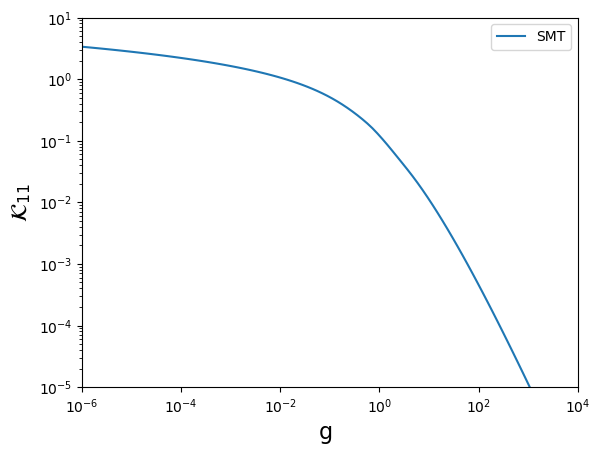

In [5]:
from SMT.core.transport import K_nm

fig, ax = plt.subplots( facecolor='white')

#
g_array = np.geomspace(1e-6,1e4,num=100)
ax.plot(g_array,[K_nm(g,1,1) for g in g_array], label='SMT')

ax.set_xlabel(r"g ", fontsize=16)
ax.set_ylabel(r"$\mathcal{K}_{11}$", fontsize=16)

# Inset Text Box
# bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-5,1e1)
ax.set_xlim(1e-6,1e4)
# Legend
ax.legend()

K_nm(1,1,2), K_nm(1,1,1) 


## Electrical Conductivity

First, loading data from [2]

In [6]:
σ_data_e1b = read_csv("Fig1b_eSMT_σ.txt", delim_whitespace=True, header=1)

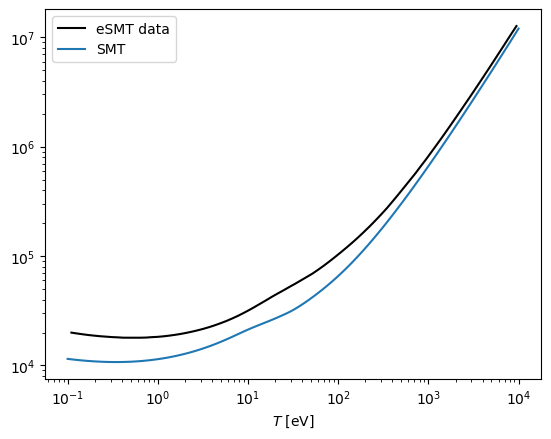

In [25]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(σ_data_e1b['T[eV]'], σ_data_e1b['σ[S/cm]'],'k-', label="eSMT data")

#
ax.plot(T_AU_list*AU_to_eV, σ_list_cgs, label='SMT')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()



## Thermal Conductivity

In [8]:
κ_data_e3b = read_csv("Fig3b_eSMT_κ.txt", delim_whitespace=True, header=1)

In [9]:
Λi  = np.sqrt(8)*props.K_22_matrix[0,0] + props._Z_array*(25*props.K_11_matrix[1:,1] - 20*props.K_12_matrix[1:,1] + 4*props.K_13_matrix[1:,1]) 
Λi, props.T_matrix[0,1:], props.K_11_matrix[1:,1]

(array([36.41321802]), array([367.49325398]), array([2.01927766]))

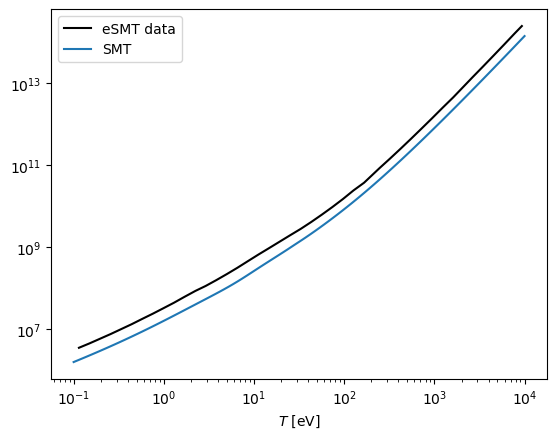

In [24]:
fig, ax = plt.subplots( facecolor='white')

# Plot digitized eSMT data
ax.plot(κ_data_e3b['T[eV]'], κ_data_e3b['κ[erg/cm/s/K]'],'k-', label="eSMT data")

#
ax.plot(T_AU_list*AU_to_eV, κ_list_cgs, label='SMT')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

# Legend
ax.legend()


In [11]:
25*props.K_11_matrix[1:,1], - 20*props.K_12_matrix[1:,1], 4*props.K_13_matrix[1:,1]

(array([50.48194149]), array([-45.5570432]), array([19.30346052]))

## Diffusion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


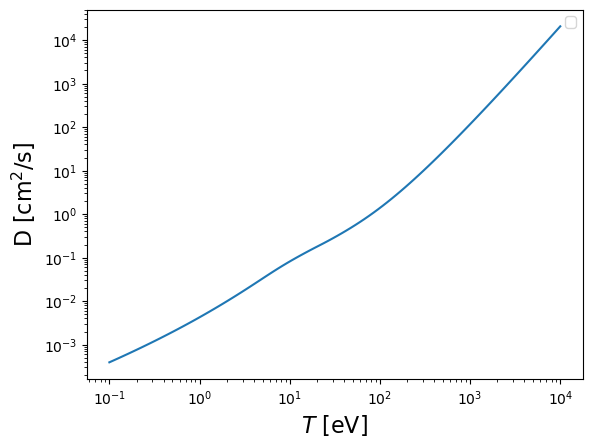

In [12]:
fig, ax = plt.subplots( facecolor='white')

ax.plot(T_AU_list*AU_to_eV, D_list_cgs, label='')

# ax.set_ylabel(r"$\eta $[g cm$^{-1}$ s$^{-1}$]")
ax.set_xlabel(r"$T$ [eV]")

# Inset Text Box
bbox = dict(boxstyle='round', facecolor='white', alpha=0.5)
# inset_text = f"{Element_name}\n {sci_notation(ni_cc,3)} [cc$^{{-1}}$]" 
# ax.text(0.35, 0.95, inset_text, transform=ax.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)

# ax.errorbar([tccw_TeV],[tccw_η_cgs], yerr=[tccw_η_cgs_err], barsabove=True, capsize=5, marker='.', label='MD Simulation')

# Scales
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel(r"D [cm$^2$/s]", fontsize=16)
ax.set_xlabel(r"$T$ [eV]", fontsize=16)

# Legend
ax.legend()


## Temperature Relaxation
In reference [1], they actually use
$$\tau_{MD} = 2/(\tau_{ei}^{-1} + \tau_{ie}^{-1}) $$
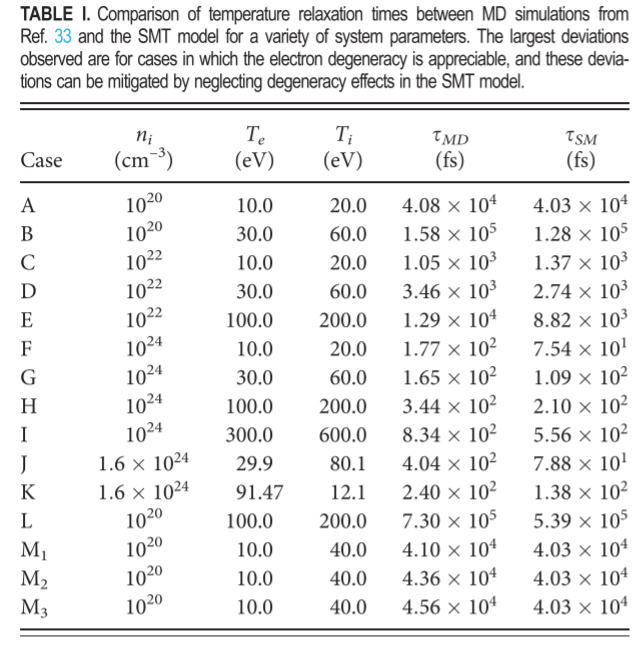


In [26]:
N_ions = 1
Z, A = 1, 1
mi_array_AU = np.array([m_amu*A])
Z_array = np.array([Z])


In [27]:
# Case A
T_array_AU = np.array([10*eV_to_AU, 20*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( props.τij[0,1]**-1 + props.τij[1,0]**-1)  *AU_to_s*1e15))

τ_SM = 4.55e+04


In [28]:
# Case B
T_array_AU = np.array([30*eV_to_AU, 60*eV_to_AU ])

# Densities
ni_array_cc = np.array([1e20])
ni_array_AU = ni_array_cc*invcc_to_AU

props = smt.TransportProperties(N_ions, mi_array_AU, Z_array, T_array_AU, ni_array_AU )
print("τ_SM = {0:.2e}".format(2/( props.τij[0,1]**-1 + props.τij[1,0]**-1)  *AU_to_s*1e15))

τ_SM = 1.35e+05


In [16]:
# 